## Imports
Execute the cell below to import all packages needed.

In [1]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from skimage import io

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_joh_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'

joh_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)
joh_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

joh_join_df = joh_tweets_df.join(joh_users_df.set_index('user_id'), on='user_id')

## Extract, Count & Sort Emojis for all

In [3]:
extract = Extractor()

count = extract.count_all_emoji(joh_join_df['text'])

# Display most common
#count.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)

,Emoji,Count
0,👀,14580
24,💕,15555
189,😹,16310
10,😁,17479
22,🤔,18054
110,🙌,18165
106,👏,19161
169,🙏,19699
108,😢,25902
5,😊,26942


## Top 15 Emojis Graph

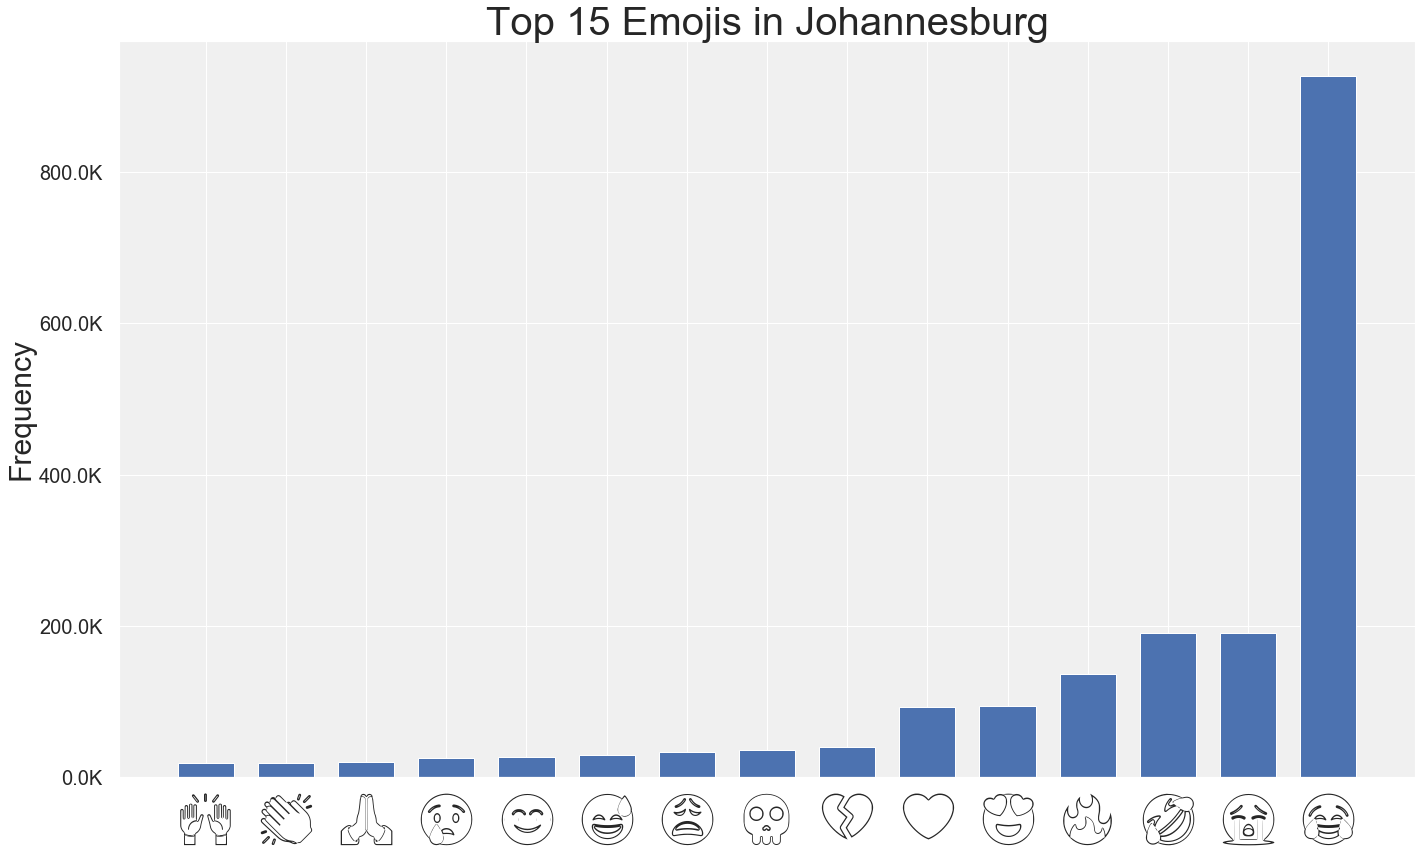

In [4]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values

# Millions Formatter Function
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x*1e-3)

# Create a formatter
formatter_millions = FuncFormatter(millions)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)
#emojis_font = FontProperties(fname='./Fonts/emojione-android.ttf',size=30)

# Plot Bar Chart
sns.set(color_codes=True) # Changes to seaborn
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_millions)
ax.tick_params(axis='both', which='major', pad=10)
ax.set_facecolor('#0F0F0F0F')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x, y, width=0.7, bottom=None, align='center', data=emojis_count_df.tail(5))
plt.xticks(x, fontproperties=emojis_font)
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in Johannesburg', fontsize =40)
plt.tight_layout()
plt.show()


## Extract, Count & Sort Emojis for females

In [ ]:
# Count emojis
count_females = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['gender'] == 'female')& (joh_join_df['gender:confidence'].astype(float)==1)]['text'])

# Display most common
#count_females.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_females:
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : count_females[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df.tail(20)

,Emoji,Count
102,🙏,5215
57,👏,5315
371,😹,6339
279,♥,6492
41,🙄,6643
4,😘,6787
84,😅,6802
188,💃,6814
63,💕,8920
140,😢,10108


## Extract, Count & Sort Emojis for males

In [ ]:
# Count emojis
count_males = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['gender'] == 'male')& (joh_join_df['gender:confidence'].astype(float)==1)]['text'])

# Display most common
#count_males.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_males_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_males:
    emojis_count_males_df = emojis_count_males_df.append({'Emoji' : emoji , 'Count' : count_males[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_males_df = emojis_count_males_df.sort_values(by=['Count'])
emojis_count_males_df.tail(20)

,Emoji,Count
15,👀,3969
37,👌,4014
97,🙏🏾,4113
201,🙌,4894
33,😢,4971
67,😊,5072
102,🙏,5186
49,🤔,5194
23,👏,5357
83,😩,5534


## Top 15 Emojis Graph by Gender

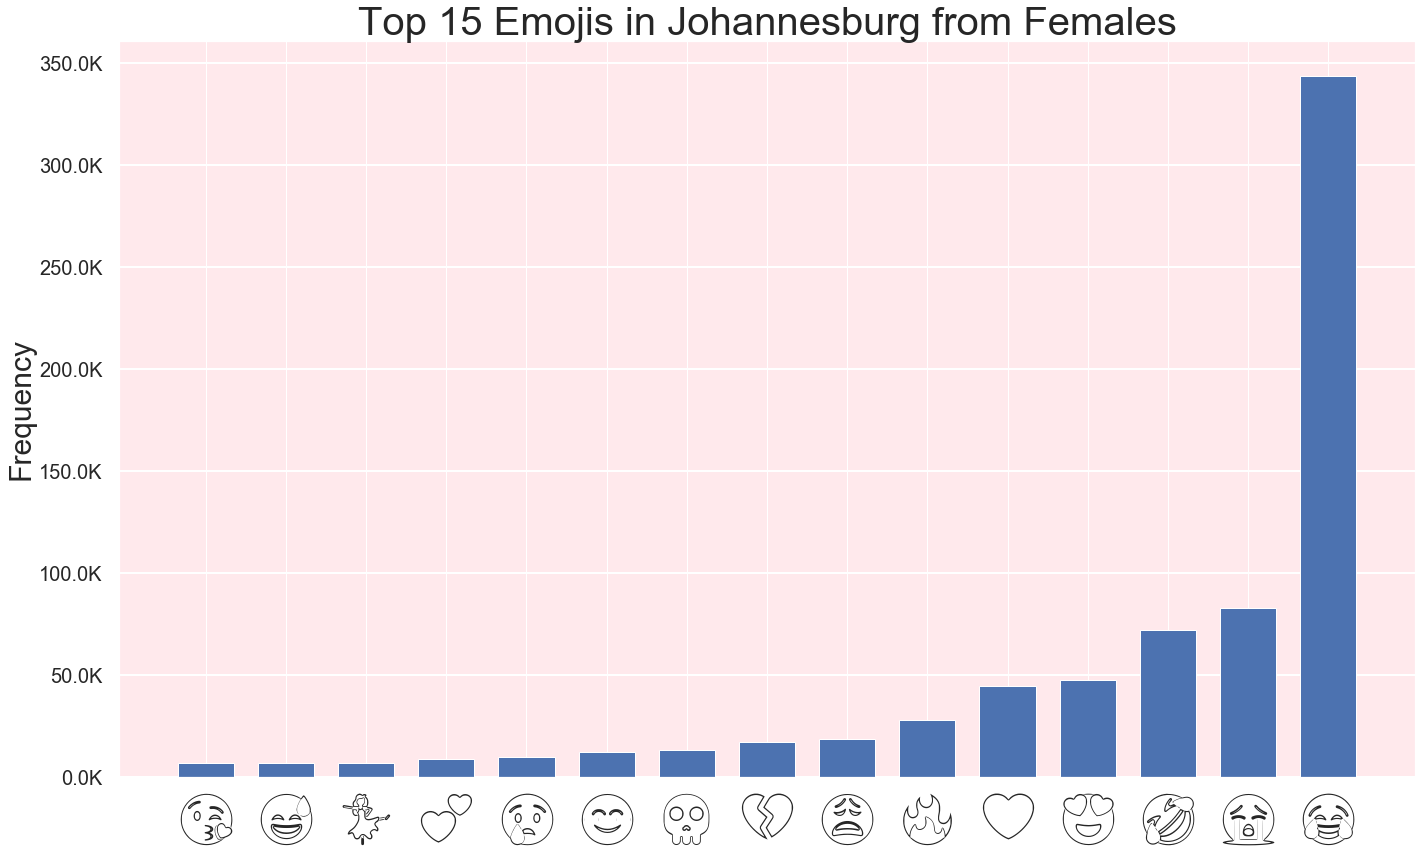

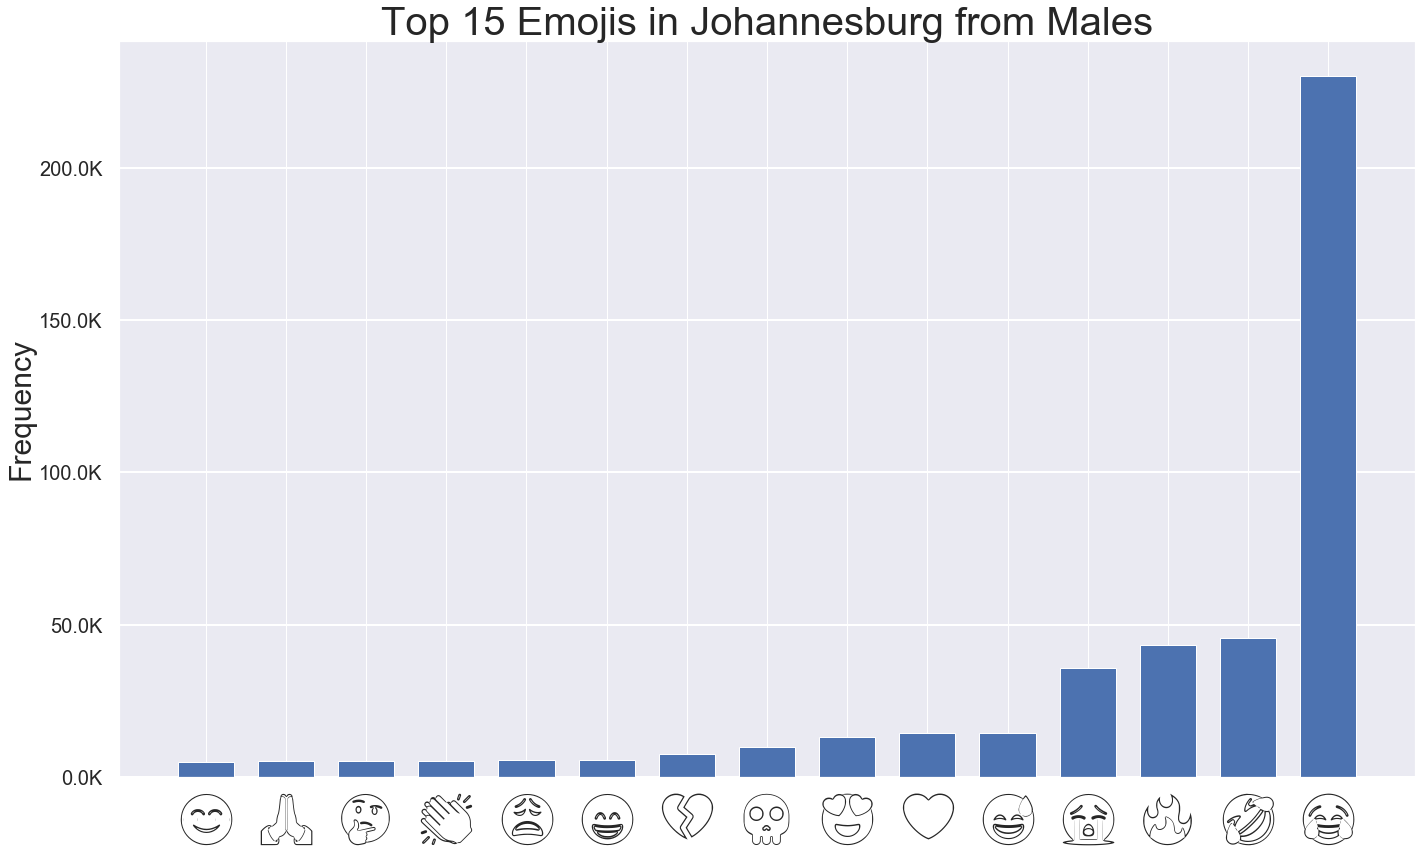

In [ ]:
# Top 15 Values Females
x_females = emojis_count_females_df['Emoji'].tail(15).values
y_females = emojis_count_females_df['Count'].tail(15).values

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_millions)
ax.tick_params(axis='both', which='major', pad=10)
ax.set_facecolor('#ffe9ec')
plt.grid( linestyle='-', linewidth=2,axis='y')
plt.bar(x_females, y_females, width=0.7, bottom=None, align='center', data=emojis_count_df.tail(5))
plt.xticks(x_females, fontproperties=emojis_font)
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in Johannesburg from Females', fontsize =40)
plt.tight_layout()
plt.show()

# Top 15 Values Males
x_males = emojis_count_males_df['Emoji'].tail(15).values
y_males = emojis_count_males_df['Count'].tail(15).values

# Plot Bar Chart
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_millions)
ax.tick_params(axis='both', which='major', pad=10)
plt.grid( linestyle='-', linewidth=2,axis='y')
plt.bar(x_males, y_males, width=0.7, bottom=None, align='center', data=emojis_count_df.tail(5))
plt.xticks(x_males, fontproperties=emojis_font)
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in Johannesburg from Males', fontsize =40)
plt.tight_layout()
plt.show()

## Extract, Count & Sort Emojis for White Ethnicity

In [ ]:
# Count emojis
count_white = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'white')& (joh_join_df['ethnicity:confidence'].astype(float)>0.9)]['text'])

# Display most common
#count_males.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_white_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_white:
    emojis_count_white_df = emojis_count_white_df.append({'Emoji' : emoji , 'Count' : count_white[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_white_df = emojis_count_white_df.sort_values(by=['Count'])
emojis_count_white_df.tail(20)

,Emoji,Count
31,🤔,312
28,🙄,356
15,😀,362
629,✋,365
33,👍,389
4,😘,392
0,😁,422
7,😉,430
29,🙏,510
34,👏,527


## Extract, Count & Sort Emojis for Black Ethnicity

In [ ]:
# Count emojis
count_black = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'black')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Display most common
#count_males.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_black_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_black:
    emojis_count_black_df = emojis_count_black_df.append({'Emoji' : emoji , 'Count' : count_black[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_black_df = emojis_count_black_df.sort_values(by=['Count'])
emojis_count_black_df.tail(20)

## Extract, Count & Sort Emojis for Hispanic Ethnicity

In [ ]:
# Count emojis
count_hispanic = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'hispanic')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Display most common
#count_males.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_hispanic_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_hispanic:
    emojis_count_hispanic_df = emojis_count_hispanic_df.append({'Emoji' : emoji , 'Count' : count_hispanic[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_hispanic_df = emojis_count_hispanic_df.sort_values(by=['Count'])
emojis_count_hispanic_df.tail(20)

## Extract, Count & Sort Emojis for Asian Ethnicity

In [ ]:
# Count emojis
count_asian = extract.count_all_emoji(joh_join_df.loc[(joh_join_df['ethnicity'] == 'asian')& (joh_join_df['ethnicity:confidence'].astype(float)>0.75)]['text'])

# Display most common
#count_males.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_asian_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_asian:
    emojis_count_asian_df = emojis_count_asian_df.append({'Emoji' : emoji , 'Count' : count_asian[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_asian_df = emojis_count_asian_df.sort_values(by=['Count'])
emojis_count_asian_df.tail(20)

## Top 15 Emojis Graph by Ethnicity

In [ ]:
ethnicities_list = ['Whites','Blacks','Hispanics','Asians']
ethnicities_values =[emojis_count_white_df,emojis_count_black_df,emojis_count_hispanic_df,emojis_count_asian_df]
graph_colours=['f2f2f2','999999','e1b68b','ffeeb7']
for i,ethn in enumerate(ethnicities_list):
    
    # Top 15 Values 
    x = ethnicities_values[i]['Emoji'].tail(15).values
    y = ethnicities_values[i]['Count'].tail(15).values
    
    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_millions)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(graph_colours[i]))
    plt.grid( linestyle='-', linewidth=2,axis='y')
    plt.bar(x, y, width=0.7, bottom=None, align='center', data=emojis_count_df.tail(5))
    plt.xticks(x, fontproperties=emojis_font)
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in Johannesburg from {}'.format(ethn), fontsize =40)
    plt.tight_layout()
    plt.show()
    